In [33]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sc
from CAMB import camb
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [34]:
wmap = np.loadtxt('wmap_tt_spectrum_9yr_v5.txt')
multipoleIndex = wmap[:,0] #ydata
PP = wmap[:,1] #xdata
errPP = wmap[:,2] #Error on x data
errInst = wmap[:,3]
errCos = wmap[:,4]
pars = [multipoleIndex,PP,errPP,errInst,errCos]

def get_spectrum(pars,lmax=2000, fixed_tau=None):
    #print('pars are ',pars)
    if fixed_tau is None:
        H0=pars[0]
        ombh2=pars[1]
        omch2=pars[2]
        tau=pars[3]
        As=pars[4]
        ns=pars[5]
    else: 
        H0=pars[0]
        ombh2=pars[1]
        omch2=pars[2]
        tau=fixed_tau
        As=pars[3]
        ns=pars[4]
    pars=camb.CAMBparams()
    pars.set_cosmology(H0=H0,ombh2=ombh2,omch2=omch2,mnu=0.06,omk=0,tau=tau)
    pars.InitPower.set_params(As=As,ns=ns,r=0)
    pars.set_for_lmax(lmax,lens_potential_accuracy=0)
    results=camb.get_results(pars)
    powers=results.get_cmb_power_spectra(pars,CMB_unit='muK')
    cmb=powers['total']
    tt=cmb[:,0]
    return tt

### Question 4 Plots

In [35]:
chain_q4 = np.loadtxt('MCMC_results_q4_chain.txt')
chi_q4 = np.loadtxt('MCMC_results_q4_chi.txt')
params_q4 = np.loadtxt('MCMC_results_q4_params.txt')

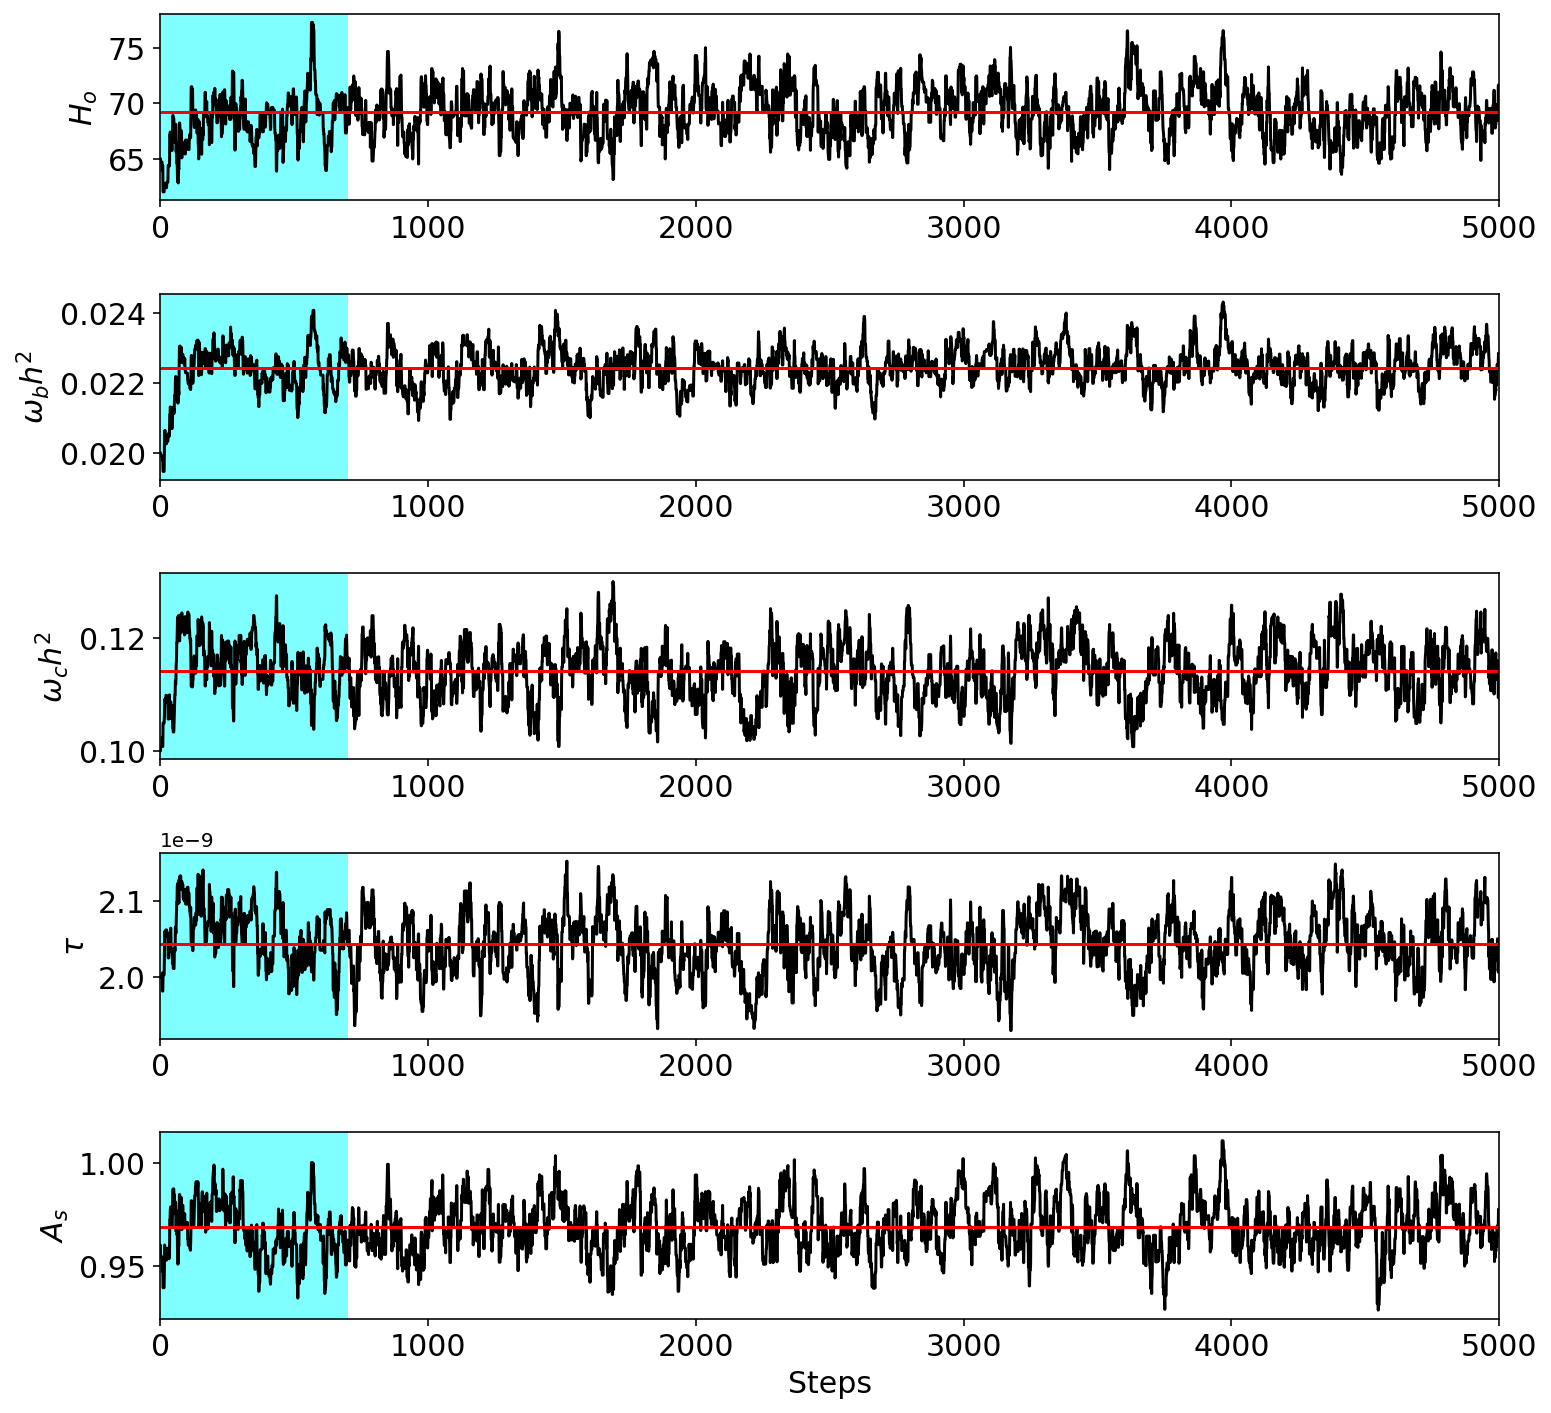

In [36]:
fig1 = plt.figure(figsize=(12,12))
interval = 700
mean_params_q4 = []
error_params_q4 = []
labels = [r"$H_o$",r"$\omega_b h^2$",r"$\omega_c h^2$",r"$\tau$",r"$A_s$","P. Slope"]

for i in range(len(params_q4)):
    ax = fig1.add_subplot(len(params_q4),1,i+1)
    fig1.subplots_adjust(hspace=.5)
    ax.plot(chain_q4[:,i], color='black')
    ax.set_ylabel(f"{labels[i]}",fontsize=15)
    ax.axvspan(0,interval,facecolor='cyan',alpha=0.5)
    ax.tick_params(labelsize=15)
    ax.set_xlim(0,5000)
    ax.axhline(np.mean(chain_q4[:,i]),color='red')
    
    mean_params_q4.append(np.mean(chain_q4[:,i]))
    error_params_q4.append(np.std(chain_q4[:,i]))
    
    if i==len(params_q4)-1:
        ax.set_xlabel("Steps",fontsize=15)

Mean parameters: [69.23281049547657, 0.022440228863196528, 0.11412979331010574, 2.04384550234617e-09, 0.9689144278400634]
Uncertainty on the mean parameters: [2.24357713805116, 0.0005565062586292544, 0.005065036742926332, 3.8967805294761205e-11, 0.012847298670255823]


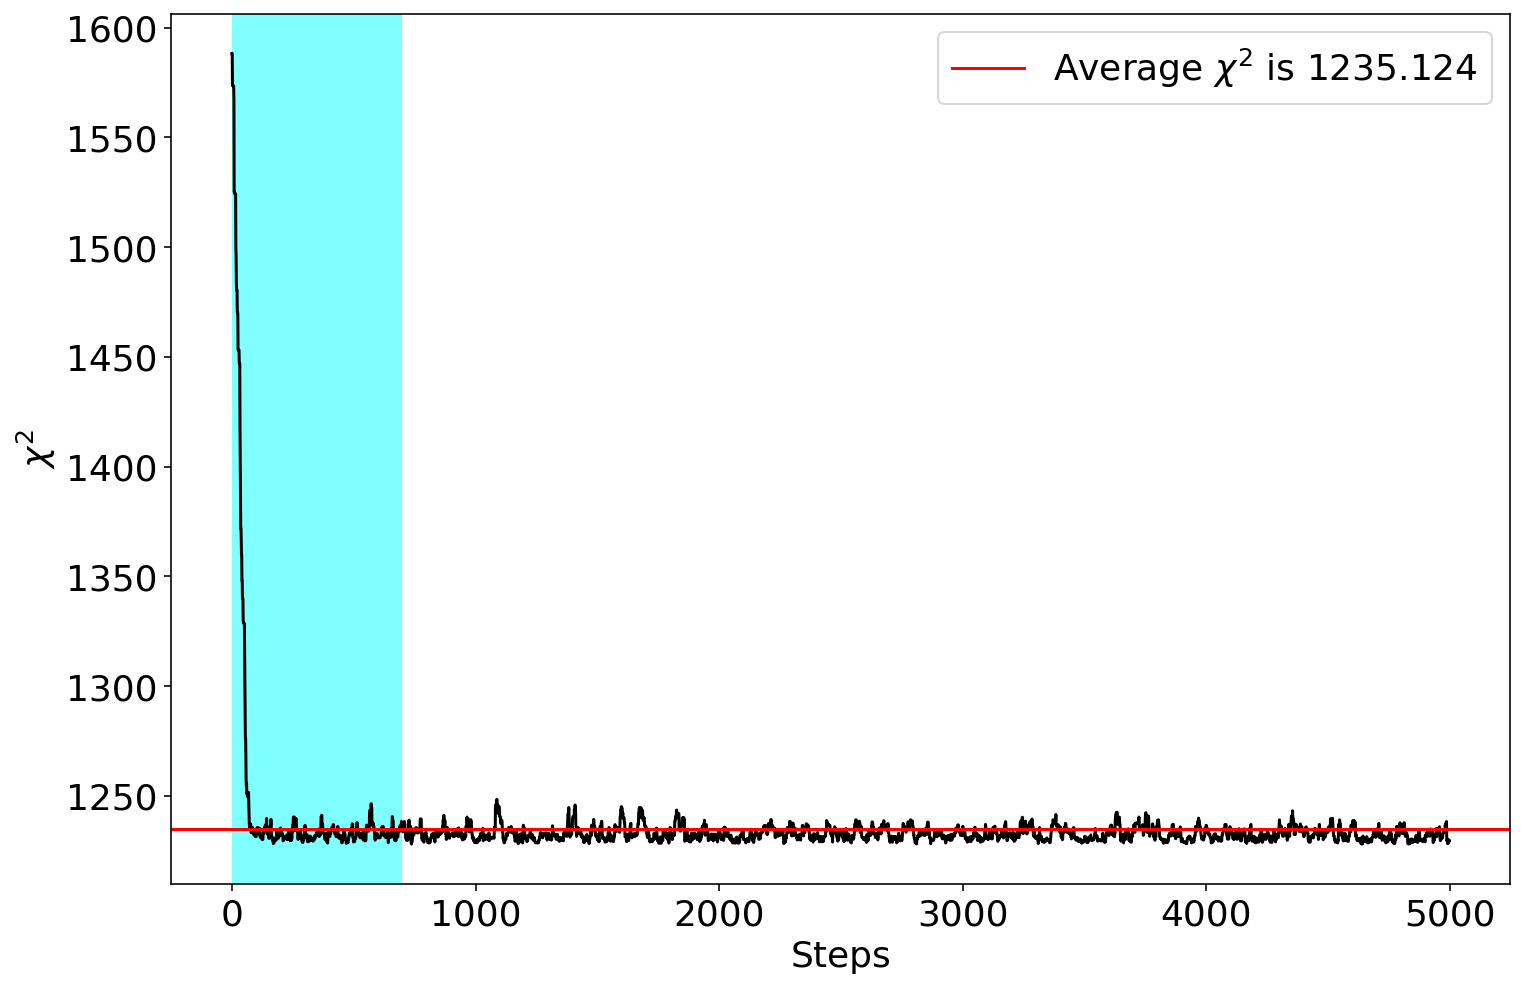

In [37]:
fig,ax1 = plt.subplots(1,1,figsize=(12,8))
ax1.plot(chi_q4,color='black')
ax1.set_xlabel("Steps",fontsize=18)
ax1.set_ylabel(r"$\chi^2$",fontsize=18)
ax1.tick_params(labelsize=18)
ax1.axhline(np.mean(chi_q4),color='red',label=r'Average $\chi^2$ is {}'.format(np.round(np.mean(chi_q4),3)))
ax1.axvspan(0,interval,facecolor='cyan',alpha=0.5)
plt.legend(fontsize=18)


print('Mean parameters:',mean_params_q4)
print('Uncertainty on the mean parameters:',error_params_q4)

### Question 5 Plots

In [38]:
chain_q5 = np.loadtxt('MCMC_results_q5_chain.txt')
chi_q5 = np.loadtxt('MCMC_results_q5_chi.txt')
params_q5 = np.loadtxt('MCMC_results_q5_params.txt')

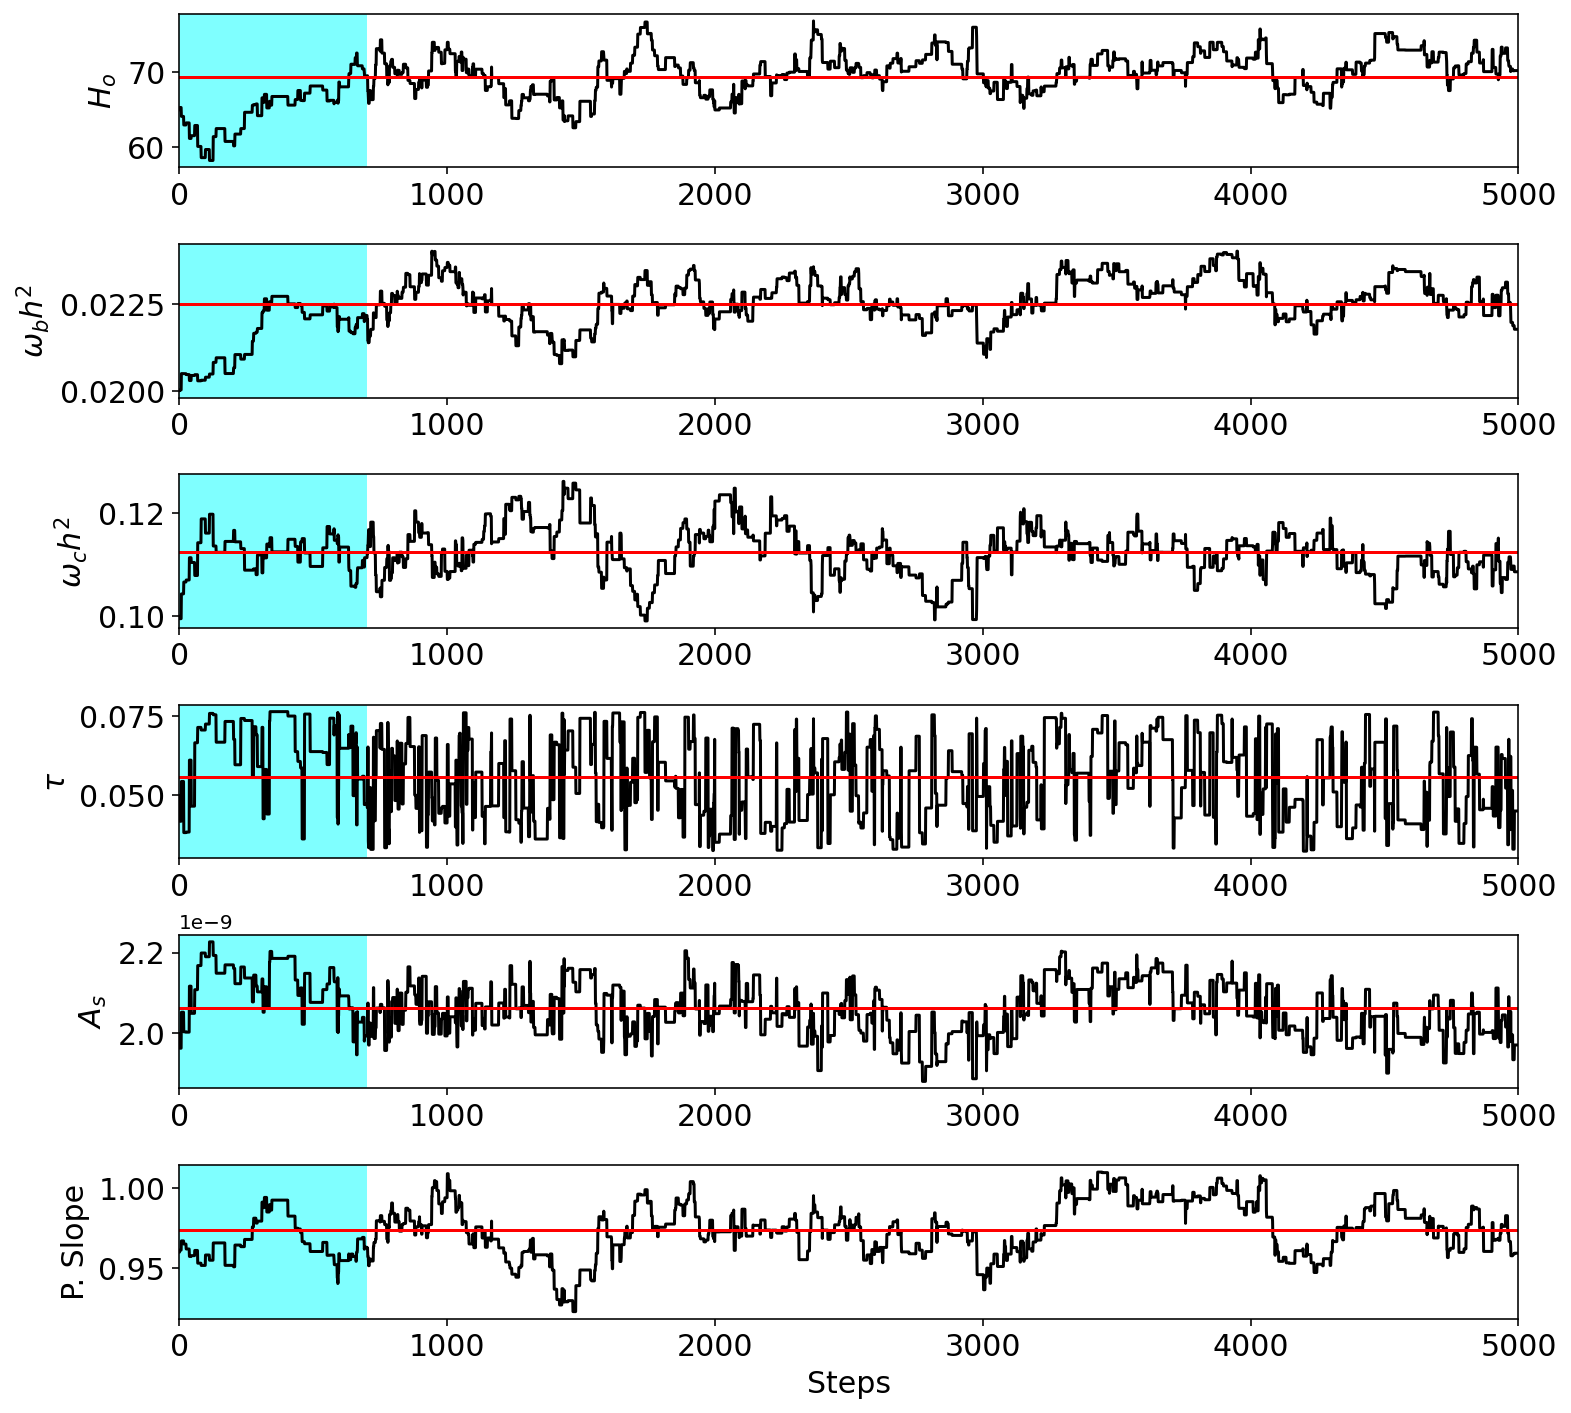

In [39]:
fig2 = plt.figure(figsize=(12,12))
interval = 700
mean_params_q5 = []
error_params_q5 = []
labels = [r"$H_o$",r"$\omega_b h^2$",r"$\omega_c h^2$",r"$\tau$",r"$A_s$","P. Slope"]

for i in range(len(params_q5)):
    ax2 = fig2.add_subplot(len(params_q5),1,i+1)
    fig2.subplots_adjust(hspace=.5)
    ax2.plot(chain_q5[:,i], color='black')
    ax2.set_ylabel(f"{labels[i]}",fontsize=15)
    ax2.axvspan(0,interval,facecolor='cyan',alpha=0.5)
    ax2.tick_params(labelsize=15)
    ax2.set_xlim(0,5000)
    ax2.axhline(np.mean(chain_q5[:,i]),color='red')
    
    mean_params_q5.append(np.mean(chain_q5[:,i]))
    error_params_q5.append(np.std(chain_q5[:,i]))
    
    if i==len(params_q5)-1:
        ax2.set_xlabel("Steps",fontsize=15)


Mean parameters: [69.42280491840582, 0.022503004047309694, 0.11237658945552646, 0.055645967721526766, 2.0622520018135854e-09, 0.9739640461769402]
Uncertainty on the mean parameters: [3.182176436413478, 0.0007406706668678901, 0.00477169497288736, 0.013065862047818523, 6.850014586196127e-11, 0.016430630811979784]


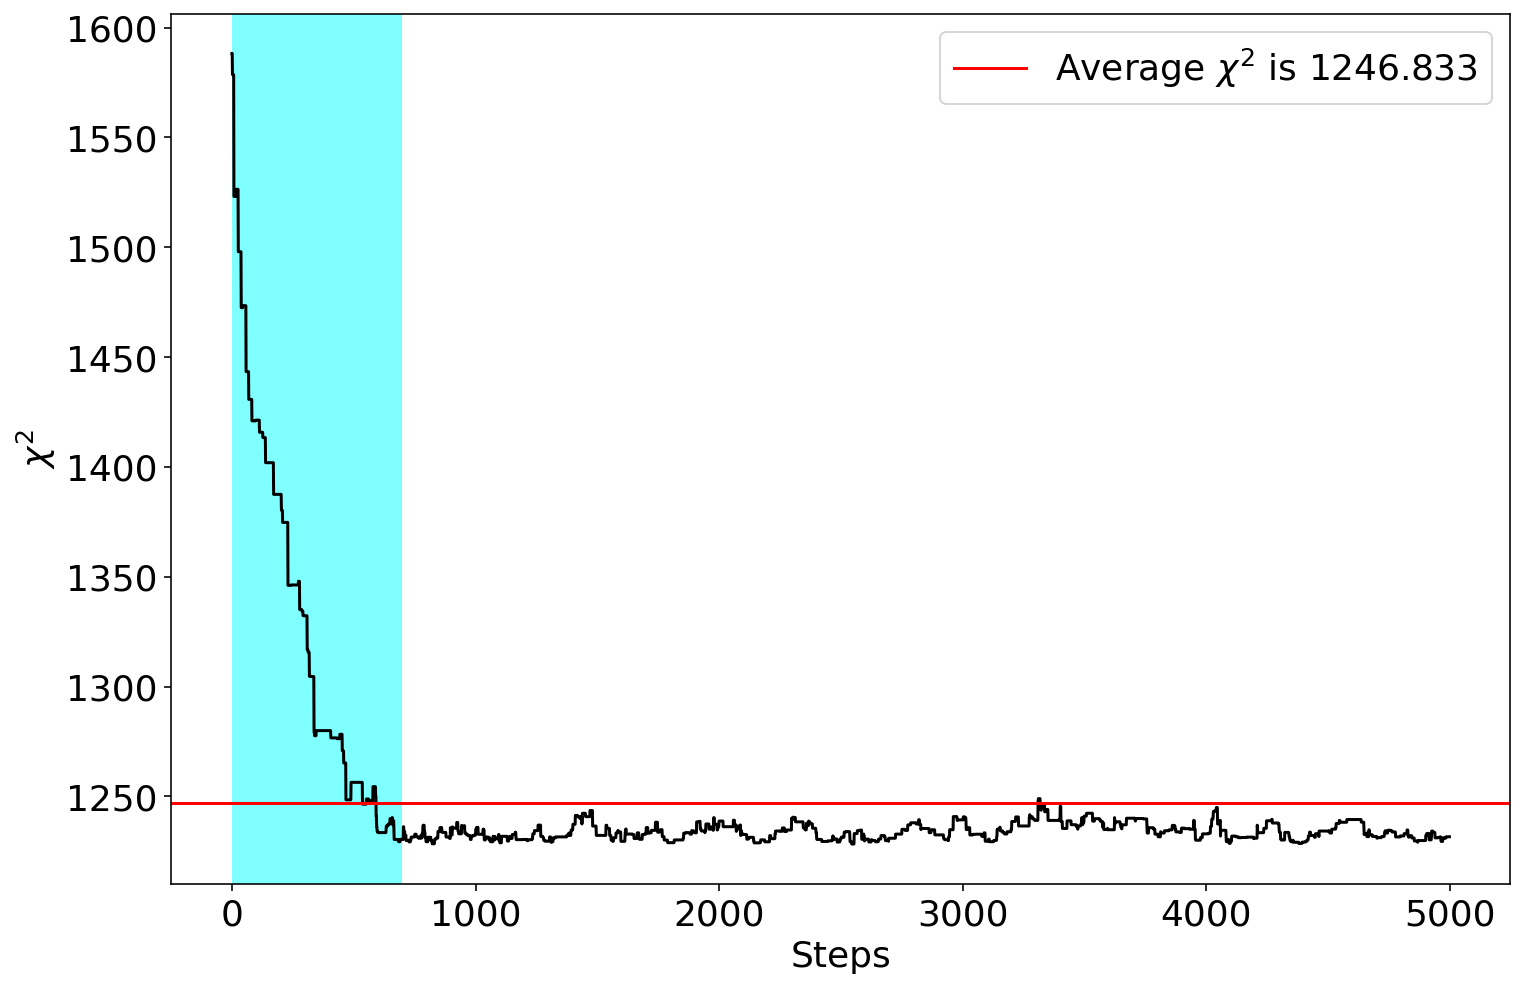

In [40]:
fig,ax3 = plt.subplots(1,1,figsize=(12,8))
ax3.plot(chi_q5,color='black')
ax3.set_xlabel("Steps",fontsize=18)
ax3.set_ylabel(r"$\chi^2$",fontsize=18)
ax3.tick_params(labelsize=18)
ax3.axhline(np.mean(chi_q5),color='red',label=r'Average $\chi^2$ is {}'.format(np.round(np.mean(chi_q5),3)))
ax3.axvspan(0,interval,facecolor='cyan',alpha=0.5)
plt.legend(fontsize=18)

        
print('Mean parameters:',mean_params_q5)
print('Uncertainty on the mean parameters:',error_params_q5)